In [7]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0'}

page = requests.get(url, headers=headers)
src = page.content
soup = BeautifulSoup(src)
movies = soup.main.ul.find_all('li')
len(movies)



25

In [9]:
print(movies[0].contents[0])

<div class="sc-fe6afd55-0 dsShDt cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--media-radius ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" data-testid="poster-watchlist-ribbon-add" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12

In [10]:
def get_movie_by_rank(rank):
    rank = rank - 1
    title = movies[rank].find('h3').text.split('.')[1].strip()
    year = movies[rank].find_all('span')[1].text.strip()
    showtime = movies[rank].find_all('span')[2].text.strip()
    rating = movies[rank].find('span',{'class':'ipc-rating-star'}).text.strip()[0:3]
    imdb_link = 'https://www.imdb.com' + movies[rank].find('a').get('href')
    return {'title':title, 'year':year, 'rating':rating, 'showtime':showtime, 'imdb_link':imdb_link}


In [11]:
def get_all_movies():
    with open('F:/Programming Languages/Python/myth_lab//DS-METHODOLOGY-TASKS/Scrapping/imdb.csv', 'w') as file:
        fieldnames = ['Title', 'Year', 'Rating', 'Showtime', 'IMDB Link']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(len(movies)):
            movie = get_movie_by_rank(i+1)
            writer.writerow({'Title': movie['title'], 'Year': movie['year'],'Rating': movie['rating'],
                            'Showtime': movie['showtime'], 'IMDB Link': movie['imdb_link']})
            
        print('Done')

In [12]:
get_all_movies()

Done


In [13]:
get_movie_by_rank(1)

{'title': 'The Shawshank Redemption',
 'year': '1994',
 'rating': '9.3',
 'showtime': '2h 22m',
 'imdb_link': 'https://www.imdb.com/title/tt0111161/?ref_=chttp_i_1'}

In [14]:
movies_df = pd.read_csv('F:/Programming Languages/Python/myth_lab/imdb.csv')
movies_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'F:/Programming Languages/Python/myth_lab/imdb.csv'

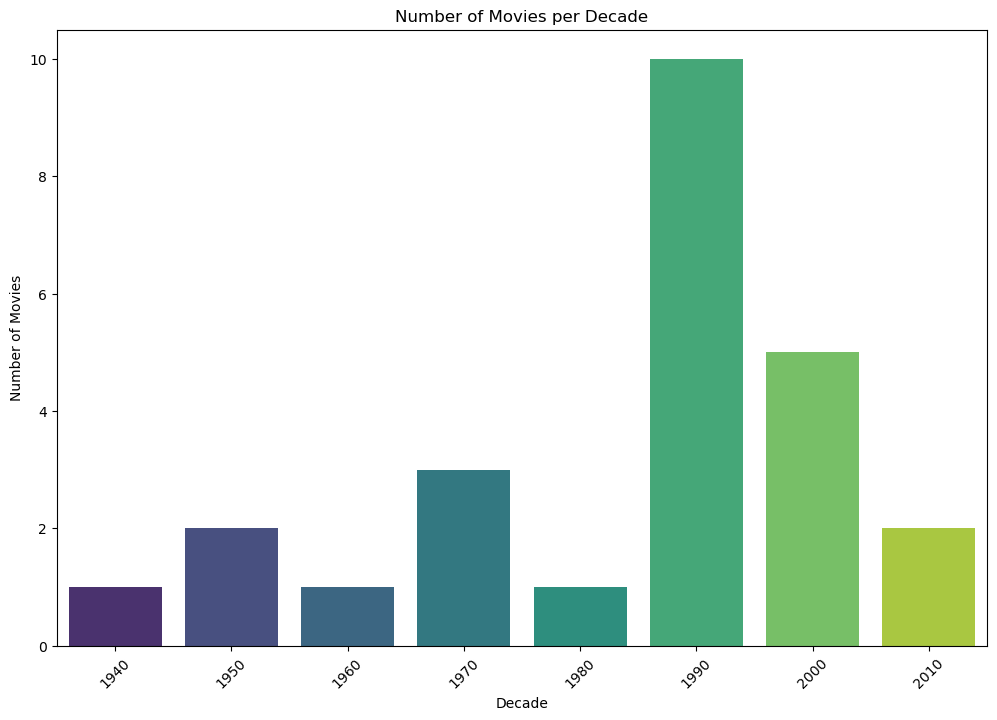

In [ ]:
# Create a new column for the 10-year intervals
movies_df['Year Interval'] = (movies_df['Year'] // 10) * 10

# Group by the 10-year intervals and count the number of movies in each interval
year_counts = movies_df['Year Interval'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

plt.show()